<a href="https://colab.research.google.com/github/boramkim0514/python01/blob/main/D28_05_%ED%9A%8C%EA%B7%80%EB%AA%A8%EB%8D%B8ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
from sklearn.datasets import load_boston

In [ ]:
data = load_boston()

In [ ]:
print(data["DESCR"])

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [ ]:
df = pd.DataFrame(
    data['data'],
    columns=data['feature_names']
    )

In [ ]:
df['MEDV'] = data['target']
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


* **CRIM**: 범죄율
* **ZN**: 25,000 평방 피트 당 주거용 토지의 비율
* **INDUS**: 비소매(non-retail) 비즈니스 면적 비율
* **CHAS**: 찰스 강 더미 변수 (통로가 하천을 향하면 1; 그렇지 않으면 0)
* **NOX**: 산화 질소 농도 (천만 분의 1)
* **RM**:주거 당 평균 객실 수
* **AGE**: 1940 년 이전에 건축된 자가 소유 점유 비율
* **DIS**: 5 개의 보스턴 고용 센터까지의 가중 거리     
* **RAD**: 고속도로 접근성 지수
* **TAX**: 10,000 달러 당 전체 가치 재산 세율
* **PTRATIO**  도시 별 학생-교사 비율
* **B**: 1000 (Bk-0.63) ^ 2 여기서 Bk는 도시 별 검정 비율입니다.
* **LSTAT**: 인구의 낮은 지위
* **MEDV**: 자가 주택의 중앙값 (1,000 달러 단위)

데이터 분할



train set / valid set 분할

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_valid, y_train, y_valid = train_test_split(
    df.drop("MEDV", axis=1),
    df["MEDV"]
)

X_train.shape, X_valid.shape

((379, 13), (127, 13))

In [ ]:
y_train.shape, y_valid.shape

((379,), (127,))

# 평가 지표 만들기
**MSE(Mean Squared Error)**
$$
MSE = \frac{1}{n}\sum_{i=1}^{n}(\hat{y}_i-t_i)^2
$$
예측값($\hat{y}$)과 실제값($t$)의 차이에 대한 **제곱**에 대하여 평균을 낸 값

**MAE(Mean Absolute Error)**
$$
MAE = \frac{1}{n}\sum_{i=1}^{n}\left | \hat{y}_i - t_i \right |
$$

예측값($\hat{y}$)과 실제값($t$)의 차이에 대한 **절대값**에 대하여 평균을 낸 값

**RMSE(Root Mean Squared Error)**
$$
RMSE = \sqrt{\frac{1}{n}\sum_{i=1}^{n}(\hat{y}_i-t_i)^2}
$$

$MSE$에 root 를 씌운 값으로써 실제 오차의 평균이라고 봐도 무방

In [ ]:
pred = np.array([3.0, 4.0, 5.3])
actual = np.array([1.0, 3.8, 6.8])

MSE 구현

In [ ]:
def my_mean_squared_error(y, t):
    return ((y-t)**2).mean()

In [ ]:
my_mean_squared_error(pred, actual)

2.0966666666666667

MAE 구현 ( 절대값 : `np.abs()` )

In [ ]:
def my_mean_absolute_error(y, t):
    return np.abs(y-t).mean()

In [ ]:
my_mean_absolute_error(pred, actual)

1.2333333333333334

In [ ]:
# def my_root_mean_absolute_error(y, t):
#     return np.sqrt(y-t).mean()

RMSE 구현

In [ ]:
def my_root_mean_squared_error(y, t):
  return np.sqrt(my_mean_squared_error(y, t))

In [ ]:
my_root_mean_squared_error(pred, actual)

1.4479871085982314

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

my_predictions = {} #딕셔너리 my_predictions에 

colors = ['r', 'c', 'm', 'y', 'k', 'khaki', 'teal', 'orchid', 'sandybrown',
          'greenyellow', 'dodgerblue', 'deepskyblue', 'rosybrown', 'firebrick',
          'deeppink', 'crimson', 'salmon', 'darkred', 'olivedrab', 'olive', 
          'forestgreen', 'royalblue', 'indigo', 'navy', 'mediumpurple', 'chocolate',
          'gold', 'darkorange', 'seagreen', 'turquoise', 'steelblue', 'slategray', 
          'peru', 'midnightblue', 'slateblue', 'dimgray', 'cadetblue', 'tomato'
         ]

def plot_predictions(name_, pred, actual):
    df = pd.DataFrame({'prediction': pred, 'actual': actual})
    df = df.sort_values(by='actual').reset_index(drop=True)

    plt.figure(figsize=(12, 9))
    plt.scatter(df.index, df['prediction'], marker='x', color='r')
    plt.scatter(df.index, df['actual'], alpha=0.7, marker='o', color='black')
    plt.title(name_, fontsize=15)
    plt.legend(['prediction', 'actual'], fontsize=12)
    plt.show()

def mse_eval(name_, pred, actual):
    global predictions
    global colors

    plot_predictions(name_, pred, actual)

    mse = mean_squared_error(pred, actual)
    my_predictions[name_] = mse

    y_value = sorted(my_predictions.items(), key=lambda x: x[1], reverse=True)
    
    df = pd.DataFrame(y_value, columns=['model', 'mse'])
    print(df)
    min_ = df['mse'].min() - 10
    max_ = df['mse'].max() + 10
    
    length = len(df)
    
    plt.figure(figsize=(10, length))
    ax = plt.subplot()
    ax.set_yticks(np.arange(len(df)))
    ax.set_yticklabels(df['model'], fontsize=15)
    bars = ax.barh(np.arange(len(df)), df['mse'])
    
    for i, v in enumerate(df['mse']):
        idx = np.random.choice(len(colors))
        bars[i].set_color(colors[idx])
        ax.text(v + 2, i, str(round(v, 3)), color='k', fontsize=15, fontweight='bold')
        
    plt.title('MSE Error', fontsize=18)
    plt.xlim(min_, max_)
    
    plt.show()

def remove_model(name_):
    global my_predictions
    try:
        del my_predictions[name_]
    except KeyError:
        return False
    return True

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [ ]:
model = LinearRegression(n_jobs=-1)
model.fit(X_train, y_train )

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=-1, normalize=False)

In [ ]:
pred = model.predict(X_valid)

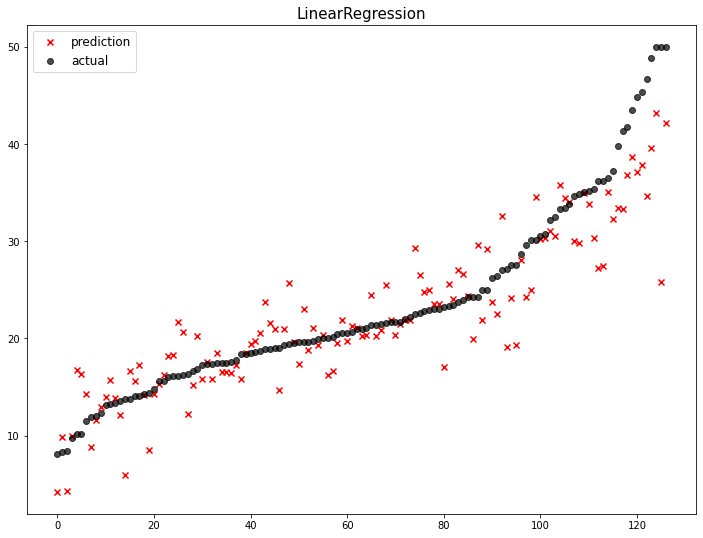

              model        mse
0  LinearRegression  19.582335


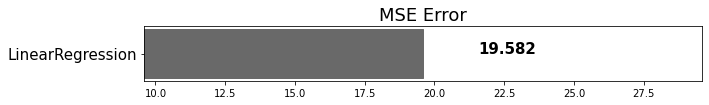

In [ ]:
mse_eval('LinearRegression', pred, y_valid) #예측 검증값 확인

결정계수지표

In [ ]:
model.score(X_valid, y_valid) #r 제곱값

0.7873154019622438

In [ ]:
model.score (X_train, y_train)#트레인 셋이 테스트 보다 높을때, 과대적합 의심

0.7178378141171284

## LinearRegression의 수식
**이걸잘해야지딥러닝이쉬워짐!!**

가중치(기울기)와 편향

wx + b x1의 가중치 
x 열백터로 그림
n feature x 의 갯수

내적 

가중치(Y^)란 입력치에 대한 강도조절(세기) 가중치가 커질수록 햇 y 값이 급격하게 증가하므로 데잍터를 복잡하게 분석함, 가중치 높이면 복잡도 높아짐 가중치 낮추면 복잡도가 단순해짐

데이터의 모델을 일반화 하기 위한 과점(과소, 과대 적합)

수학 의미 부여

- KNN 이웃의 갯수 높아지면 모델이 복잡해짐


## LinearRegression의 수식
* 기울기(W) 편향

## 가중치의 의미
* 입력되고 있는 데이터($x$)들의 각각의 중요도를 판단하는 것

* $\hat{y}$ 에 얼마나 값을 늘이고 줄이는데 어떤 영향을 미치는가?
양수/음수 가중치의 방향?! 

* 가중치의 절대갓이 커지면 예측값에 영향을 많이 미친다 -> 모델이 복잡해진다

* 가중치의 절대값이 작아지면 예측값에 영향을 덜 미침 -> 모델이 단순해짐

가중치 0.1 0.5 1. 2 등 민감 둔감하게 바뀌는지 보기

# LinearRegression은 가중치를 조절할 방법이 없습니다.
## 규제($\alpha$ - Regularization)를 사용하는 모델을 사용해서 가중치를 조절

* $\alpha$ : **penalty**부여 매개변수 ( 또는 람다($\lambda$) )


가중치에 패널티 부여
$a$ **penalty 
 ($\lambda$


패널티 늘어나면 가중치가 줌(억제됨)

## 규제 방식
**L2 규제(L2 Regularization)**
  * 각 가중치 제곱의 합에 규제 강도인 ($\alpha$)를 곱하여 오차에 더한다.
    * $\alpha$를 크게 하면 가중치가 더 많이 감소 (규제를 더 중요하게 생각하겠다.)
    * $\alpha$를 작게 하면 가중치가 증가한다.( 규제를 중요하게 생각하지 않음 )

**L1 규제(L1 Regularization)**
* 가중치의 합을 더한 값에 규제 강도인 ($\alpha$)를 곱하여 오차에 더한다.

* 어떤 가중치는 실제 0이 되어버려서
    - 모델이 특성을 선택하게 됨

** L2  규제가 L1 규제에 비해 안정적이라 일반적으로 L2 규제가 더 많이 사용된다

**릿지(Ridge) - L2 규제**
$$
  E = MSE + \alpha \sum w^2
$$



In [ ]:
from sklearn.linear_model import Ridge
#값이 커질수록 큰 규제 - 가중치가 줄어든다

alphas = [100, 10, 1, 0.1, 0.01, 0.001, 0.0001]

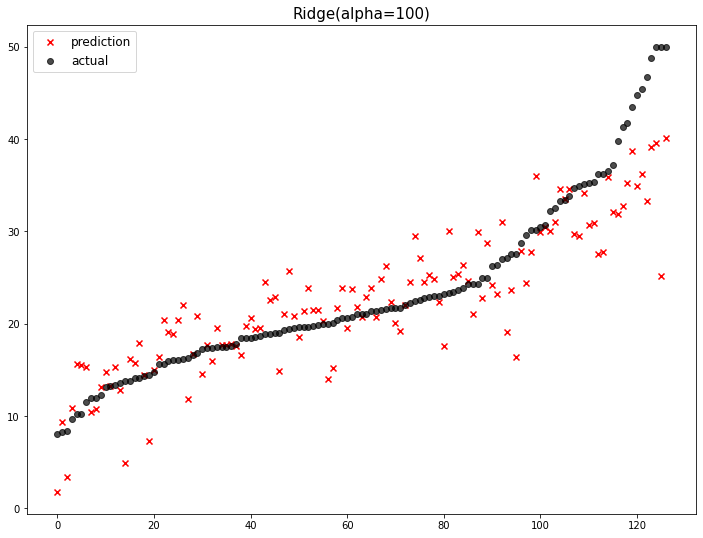

              model        mse
0  Ridge(alpha=100)  23.948544


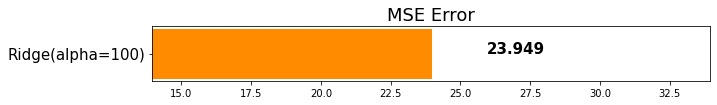

Ridge(alpha100) Train Score : 0.6952401650346154 / Valid Score : 0.7398938221958372


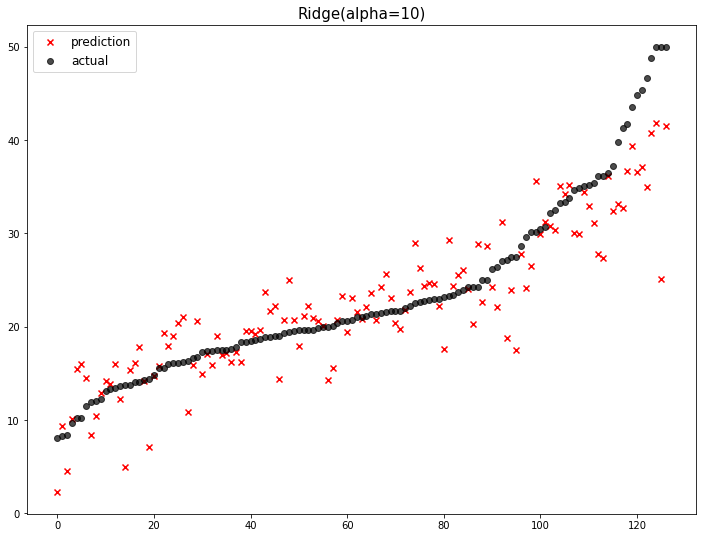

              model        mse
0  Ridge(alpha=100)  23.948544
1   Ridge(alpha=10)  20.904899


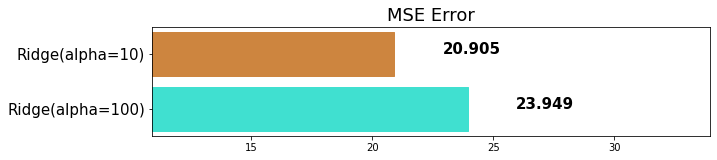

Ridge(alpha10) Train Score : 0.7077881047187671 / Valid Score : 0.772950980505443


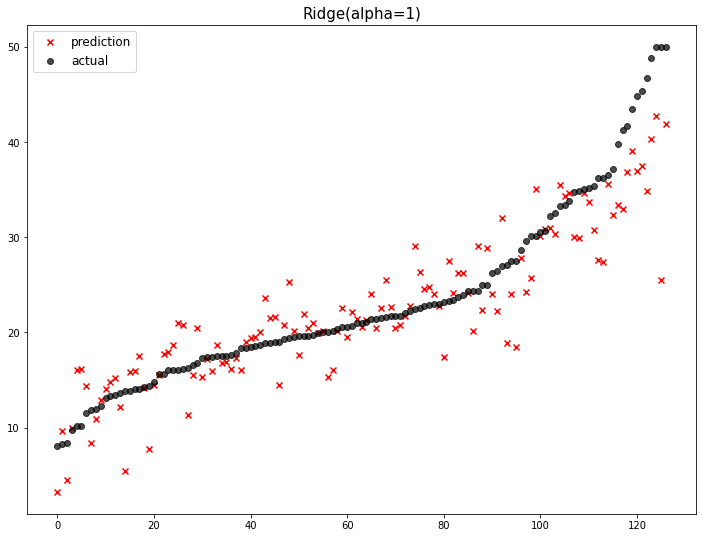

              model        mse
0  Ridge(alpha=100)  23.948544
1   Ridge(alpha=10)  20.904899
2    Ridge(alpha=1)  19.785997


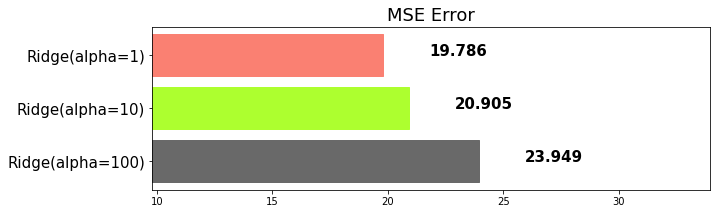

Ridge(alpha1) Train Score : 0.7151200401074123 / Valid Score : 0.7851034260095698


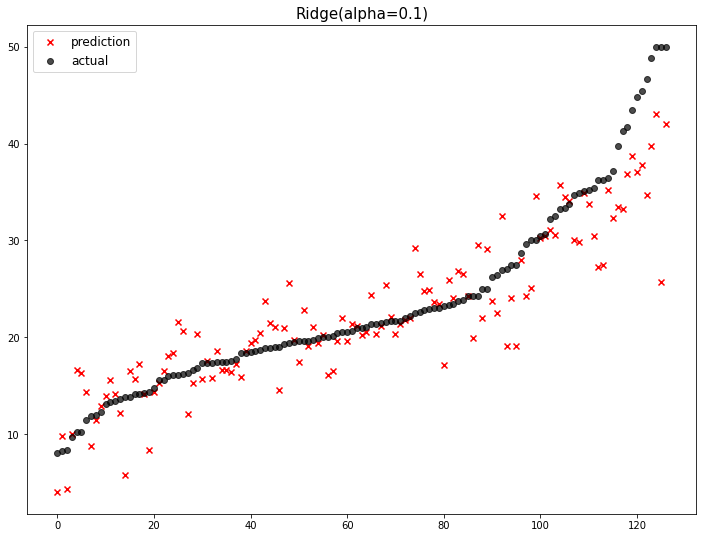

              model        mse
0  Ridge(alpha=100)  23.948544
1   Ridge(alpha=10)  20.904899
2    Ridge(alpha=1)  19.785997
3  Ridge(alpha=0.1)  19.571019


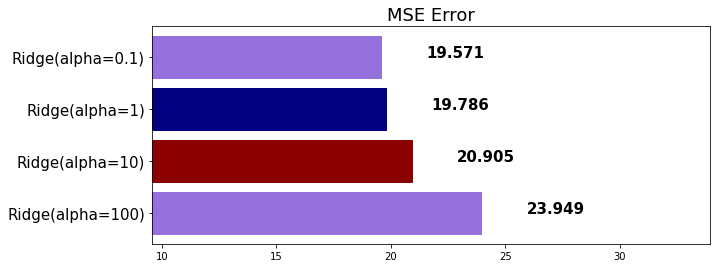

Ridge(alpha0.1) Train Score : 0.7177534313588673 / Valid Score : 0.7874383048864501


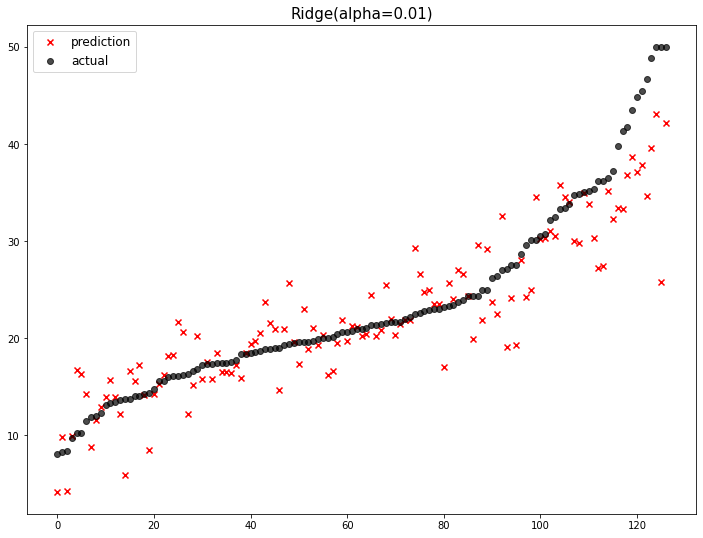

               model        mse
0   Ridge(alpha=100)  23.948544
1    Ridge(alpha=10)  20.904899
2     Ridge(alpha=1)  19.785997
3  Ridge(alpha=0.01)  19.580180
4   Ridge(alpha=0.1)  19.571019


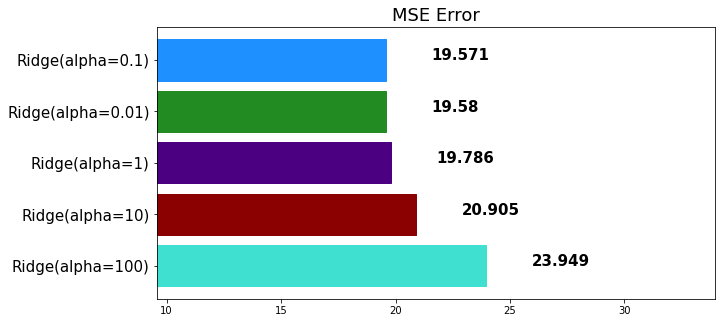

Ridge(alpha0.01) Train Score : 0.7178368251142395 / Valid Score : 0.7873388053729696


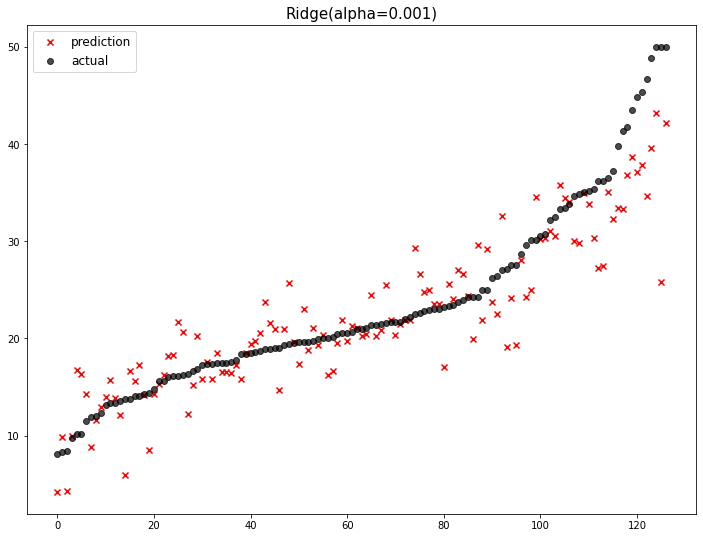

                model        mse
0    Ridge(alpha=100)  23.948544
1     Ridge(alpha=10)  20.904899
2      Ridge(alpha=1)  19.785997
3  Ridge(alpha=0.001)  19.582108
4   Ridge(alpha=0.01)  19.580180
5    Ridge(alpha=0.1)  19.571019


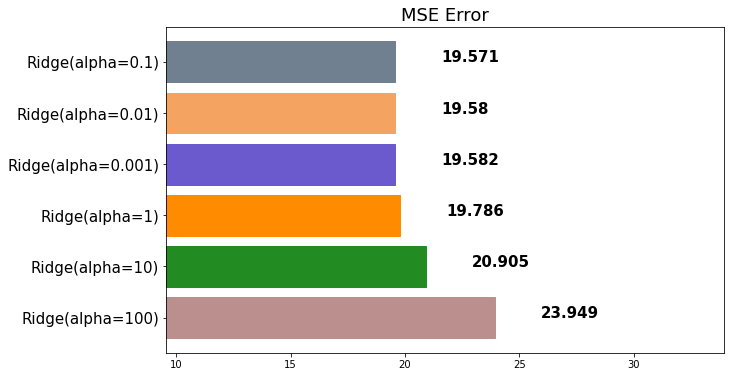

Ridge(alpha0.001) Train Score : 0.7178378040616322 / Valid Score : 0.7873178724390472


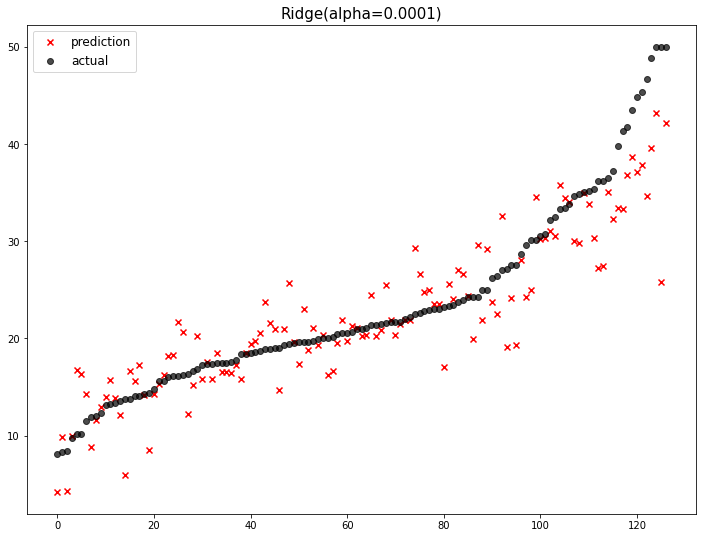

                 model        mse
0     Ridge(alpha=100)  23.948544
1      Ridge(alpha=10)  20.904899
2       Ridge(alpha=1)  19.785997
3  Ridge(alpha=0.0001)  19.582312
4   Ridge(alpha=0.001)  19.582108
5    Ridge(alpha=0.01)  19.580180
6     Ridge(alpha=0.1)  19.571019


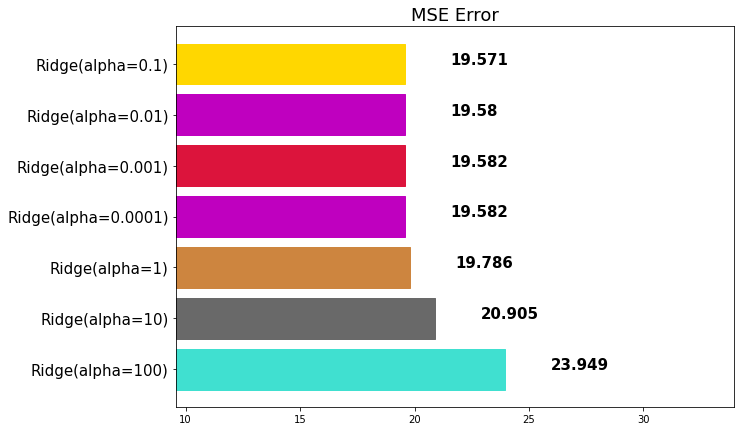

Ridge(alpha0.0001) Train Score : 0.7178378140164058 / Valid Score : 0.7873156503328634


In [ ]:
for alpha in alphas:
    ridge = Ridge(alpha=alpha)
    ridge.fit(X_train, y_train)

    pred = ridge.predict(X_valid)
    valid_score = ridge.score(X_valid, y_valid)
    train_score = ridge.score(X_train, y_train)

    mse_eval(f"Ridge(alpha={alpha})", pred, y_valid)
    print(f"Ridge(alpha{alpha}) Train Score : {train_score} / Valid Score : {valid_score}")

Ridge에 의해서 설정된 가중치 확인

In [ ]:
ridge.coef_

array([-1.10796385e-01,  4.56477567e-02,  3.76353070e-02,  2.12172380e+00,
       -1.82916421e+01,  3.17274380e+00,  4.71737003e-04, -1.46871844e+00,
        2.90576024e-01, -1.07543827e-02, -9.96924280e-01,  8.43784352e-03,
       -5.68883442e-01])

In [ ]:
X_train.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT'],
      dtype='object')

In [ ]:
#가중치 데이터프레임 만들기
def plot_coef(columns, coef):
    coef_df = pd.DataFrame(list(zip(columns, coef)))
    coef_df.columns = ["feature", "coef"]

    coef_df = coef_df.sort_values(by="coef", ascending=False).reset_index(drop=True)

    fig, ax = plt.subplots(figsize=(9,7))
    ax.barh(np.arange(len(coef_df)), coef_df['coef'])

    idx = np.arange(len(coef_df))
    ax.set_yticks(idx)
    ax.set_yticklables(coef_df['feature'])
    fig.tight_layout()
    plt.show()

AttributeError: ignored

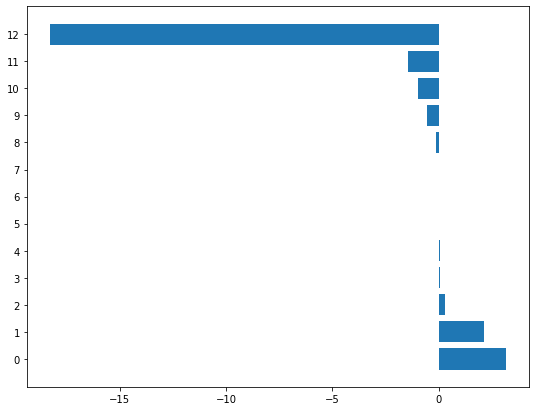

In [ ]:
plot_coef(X_train.columns, ridge.coef_)

alpha 값에 따른 coef 의 차이

In [ ]:
ridge100 = Ridge(alpha=100)
ridge100.fit(X_train, y_train)
ridge_pred_100 = ridge100.predict(X_valid)

ridge001 = Ridge(alpha=0.001)
ridge001.fit(X_train, y_train)
ridge_pred_001 = ridge001.predict(X_valid)

AttributeError: ignored

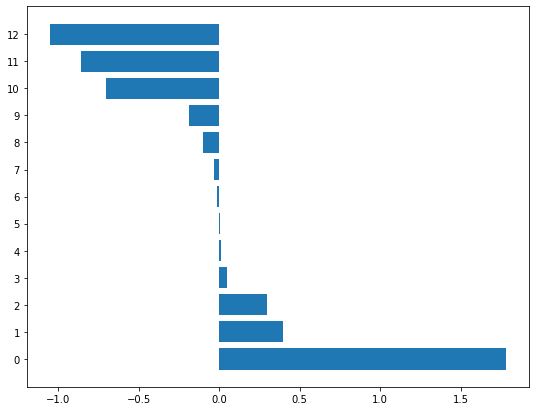

In [ ]:
#alpha 100일 때에는 가중치가 0에 가깝게 설정된 것을 확인
#plot_coef(X_train.columns, ridge100.coef_)
plot_coef(X_train.columns, ridge100.coef_)

AttributeError: ignored

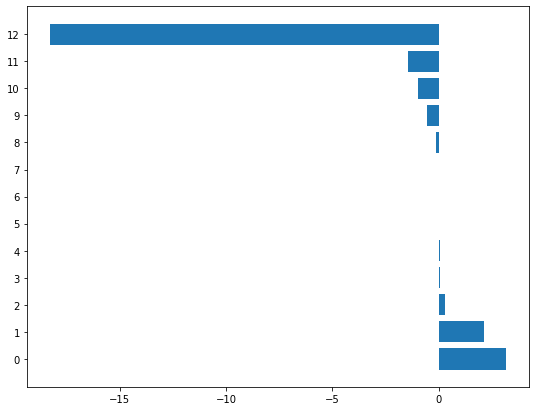

In [ ]:
plot_coef(X_train.columns, ridge001.coef_)

In [ ]:
from sklearn.linear_model import Lasso

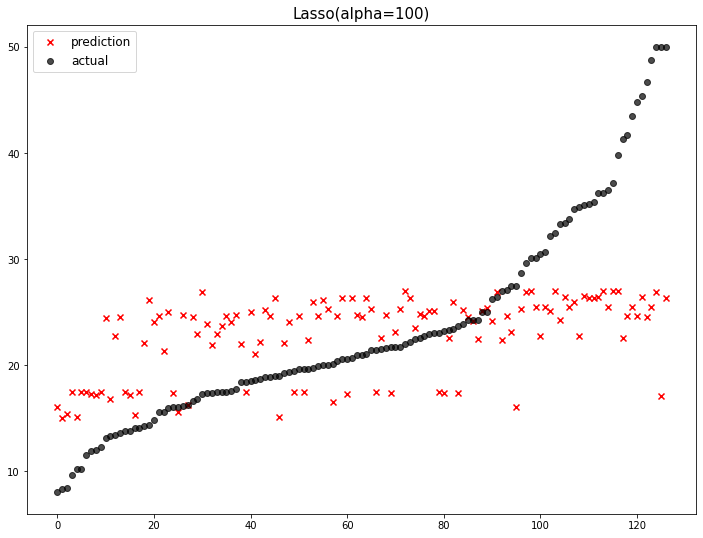

                 model        mse
0     Lasso(alpha=100)  72.630059
1     Ridge(alpha=100)  23.948544
2      Ridge(alpha=10)  20.904899
3       Ridge(alpha=1)  19.785997
4  Ridge(alpha=0.0001)  19.582312
5   Ridge(alpha=0.001)  19.582108
6    Ridge(alpha=0.01)  19.580180
7     Ridge(alpha=0.1)  19.571019


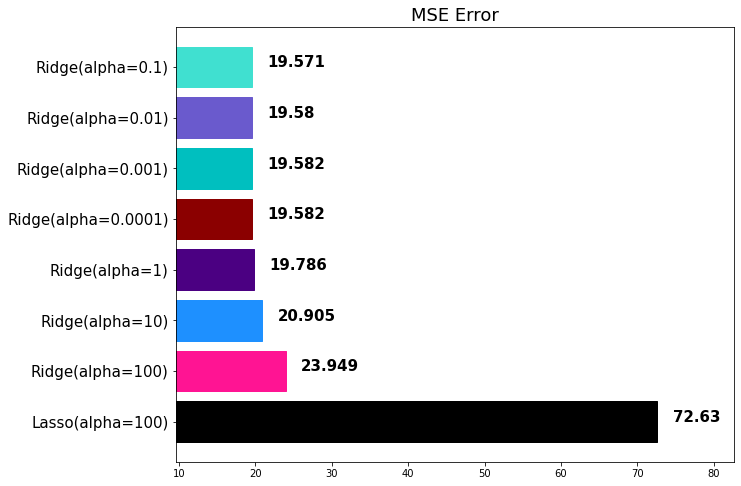

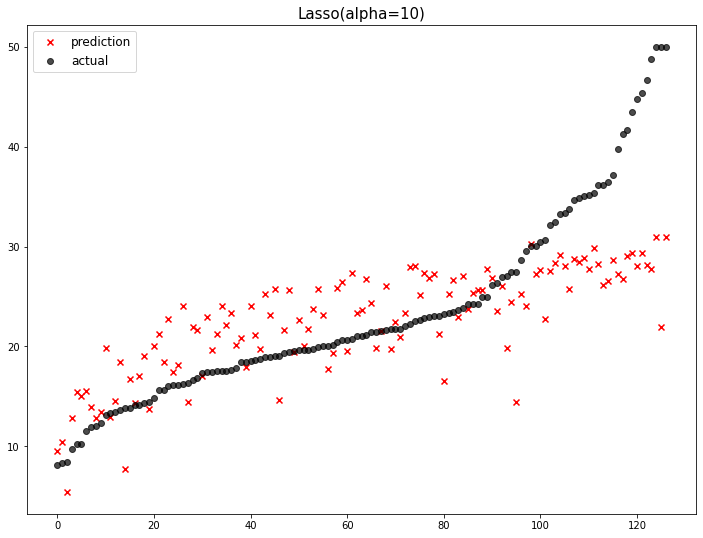

                 model        mse
0     Lasso(alpha=100)  72.630059
1      Lasso(alpha=10)  46.797567
2     Ridge(alpha=100)  23.948544
3      Ridge(alpha=10)  20.904899
4       Ridge(alpha=1)  19.785997
5  Ridge(alpha=0.0001)  19.582312
6   Ridge(alpha=0.001)  19.582108
7    Ridge(alpha=0.01)  19.580180
8     Ridge(alpha=0.1)  19.571019


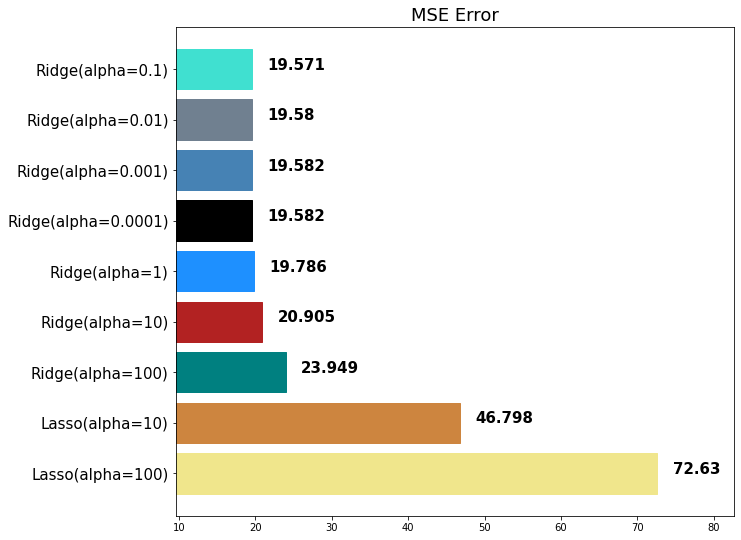

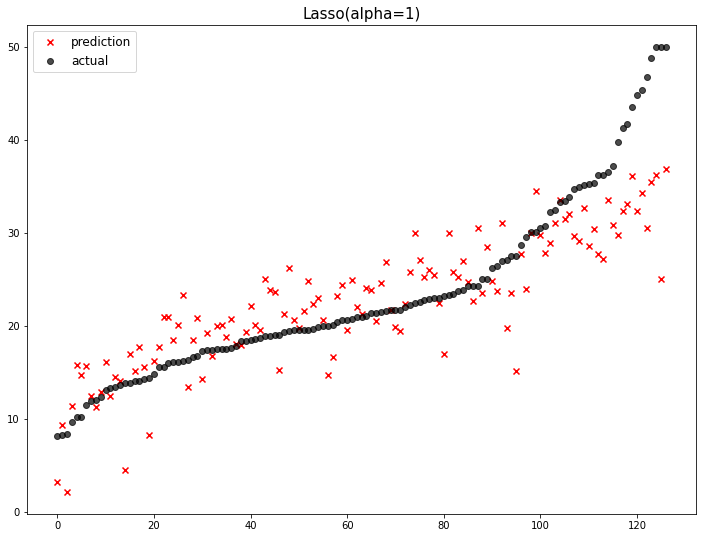

                 model        mse
0     Lasso(alpha=100)  72.630059
1      Lasso(alpha=10)  46.797567
2       Lasso(alpha=1)  29.880988
3     Ridge(alpha=100)  23.948544
4      Ridge(alpha=10)  20.904899
5       Ridge(alpha=1)  19.785997
6  Ridge(alpha=0.0001)  19.582312
7   Ridge(alpha=0.001)  19.582108
8    Ridge(alpha=0.01)  19.580180
9     Ridge(alpha=0.1)  19.571019


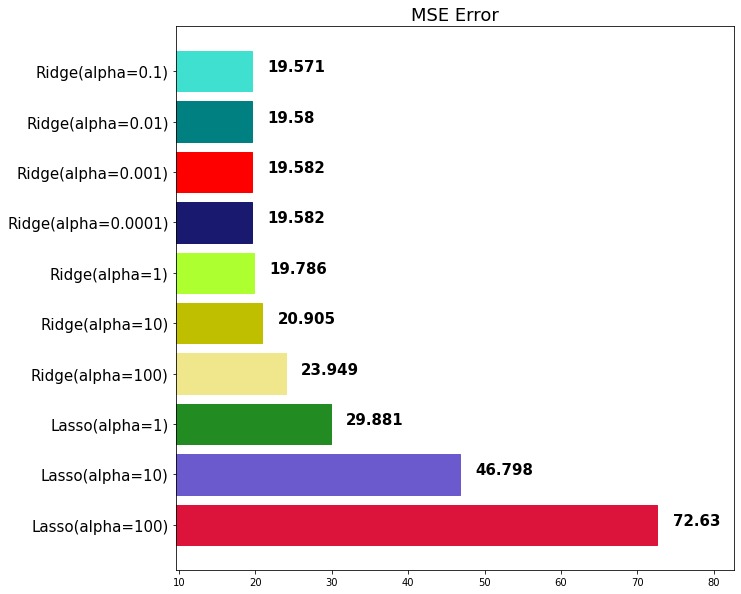

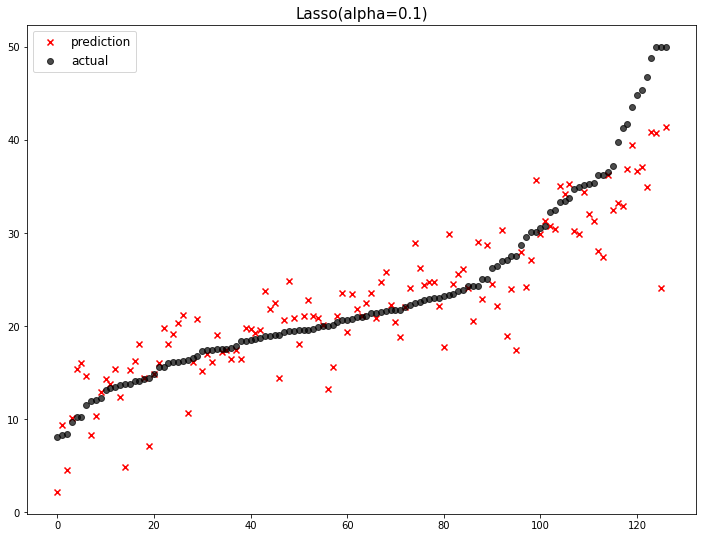

                  model        mse
0      Lasso(alpha=100)  72.630059
1       Lasso(alpha=10)  46.797567
2        Lasso(alpha=1)  29.880988
3      Ridge(alpha=100)  23.948544
4      Lasso(alpha=0.1)  21.642204
5       Ridge(alpha=10)  20.904899
6        Ridge(alpha=1)  19.785997
7   Ridge(alpha=0.0001)  19.582312
8    Ridge(alpha=0.001)  19.582108
9     Ridge(alpha=0.01)  19.580180
10     Ridge(alpha=0.1)  19.571019


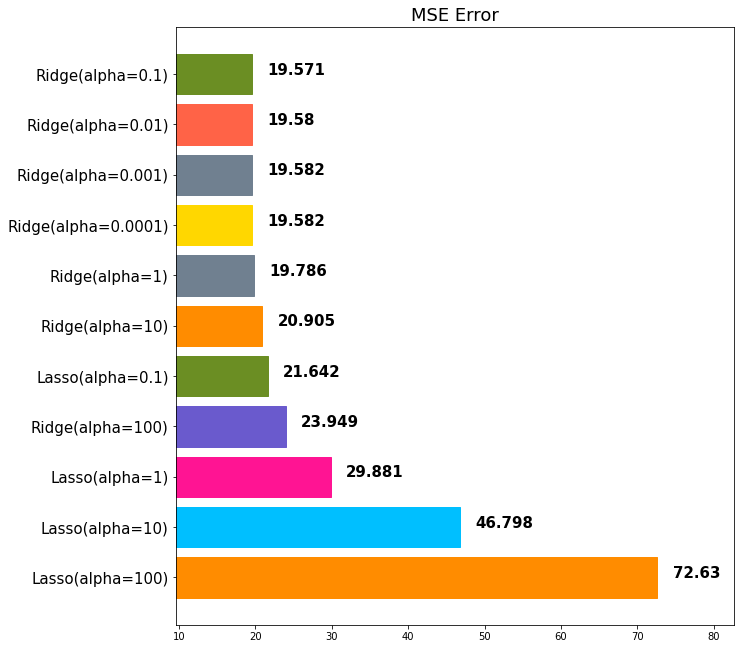

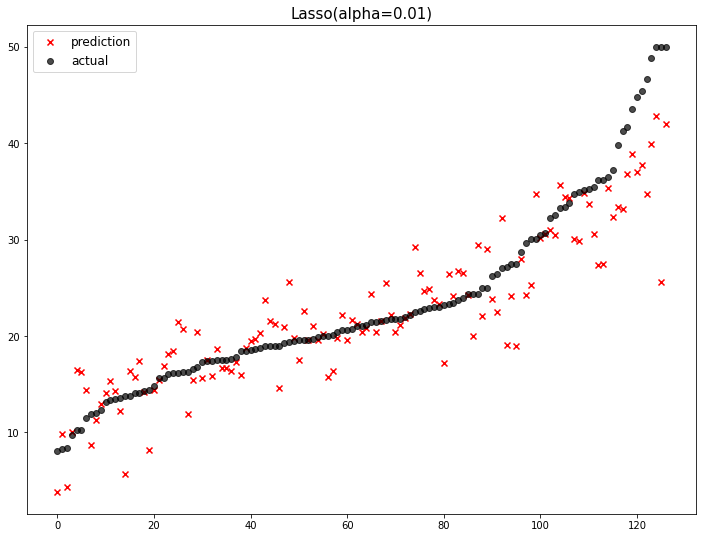

                  model        mse
0      Lasso(alpha=100)  72.630059
1       Lasso(alpha=10)  46.797567
2        Lasso(alpha=1)  29.880988
3      Ridge(alpha=100)  23.948544
4      Lasso(alpha=0.1)  21.642204
5       Ridge(alpha=10)  20.904899
6        Ridge(alpha=1)  19.785997
7     Lasso(alpha=0.01)  19.656366
8   Ridge(alpha=0.0001)  19.582312
9    Ridge(alpha=0.001)  19.582108
10    Ridge(alpha=0.01)  19.580180
11     Ridge(alpha=0.1)  19.571019


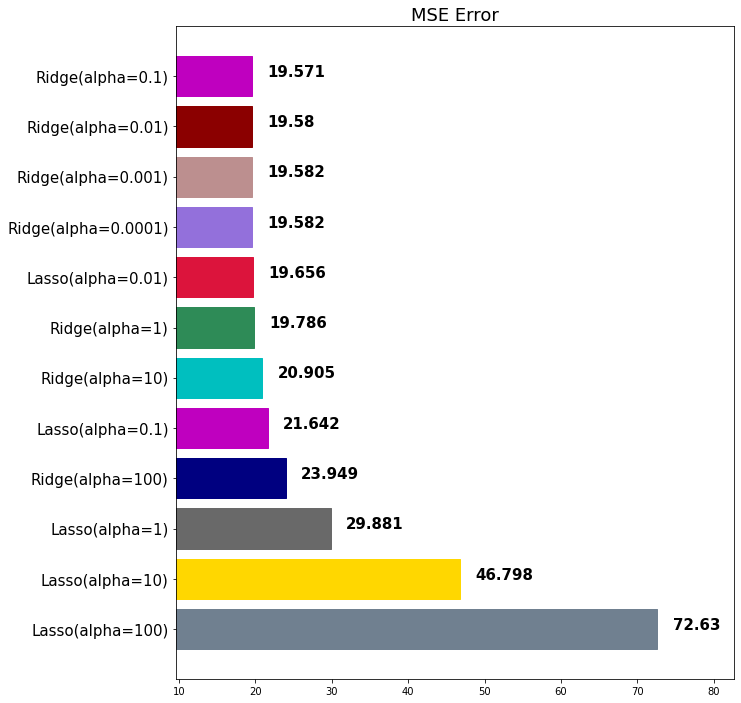

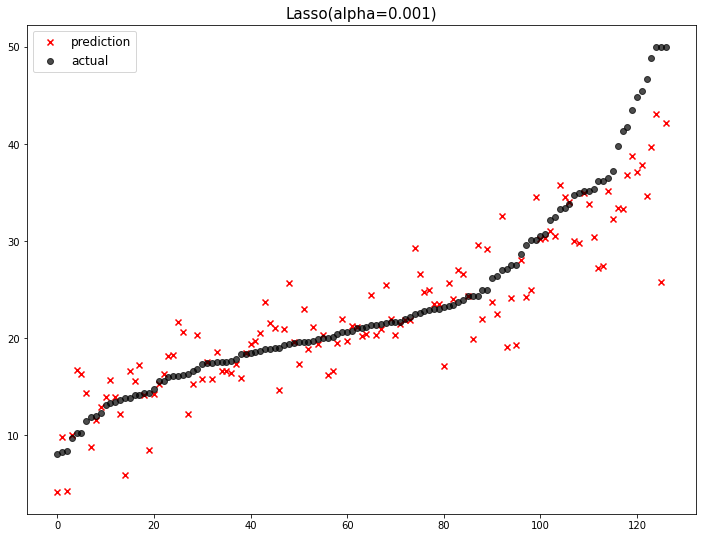

                  model        mse
0      Lasso(alpha=100)  72.630059
1       Lasso(alpha=10)  46.797567
2        Lasso(alpha=1)  29.880988
3      Ridge(alpha=100)  23.948544
4      Lasso(alpha=0.1)  21.642204
5       Ridge(alpha=10)  20.904899
6        Ridge(alpha=1)  19.785997
7     Lasso(alpha=0.01)  19.656366
8    Lasso(alpha=0.001)  19.585064
9   Ridge(alpha=0.0001)  19.582312
10   Ridge(alpha=0.001)  19.582108
11    Ridge(alpha=0.01)  19.580180
12     Ridge(alpha=0.1)  19.571019


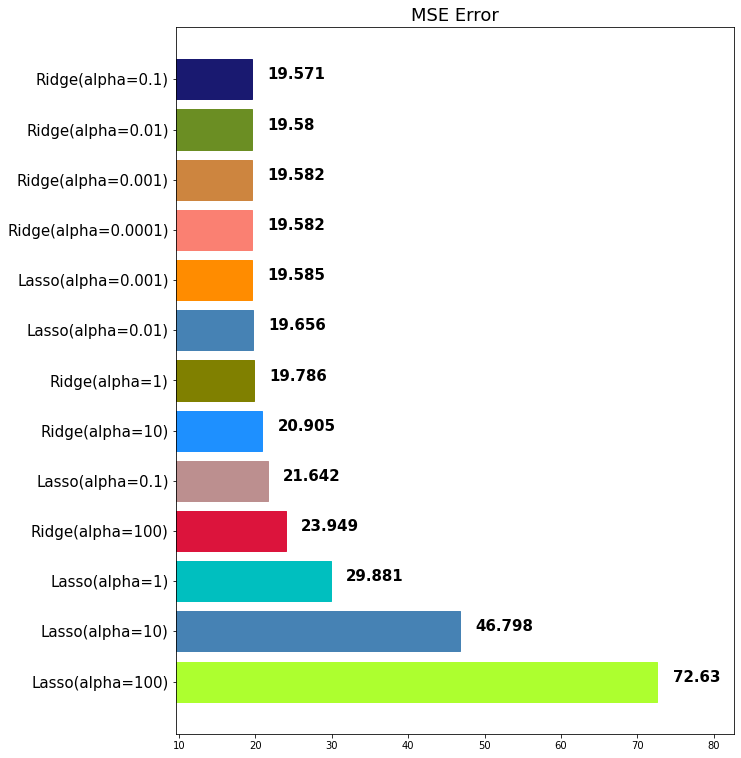

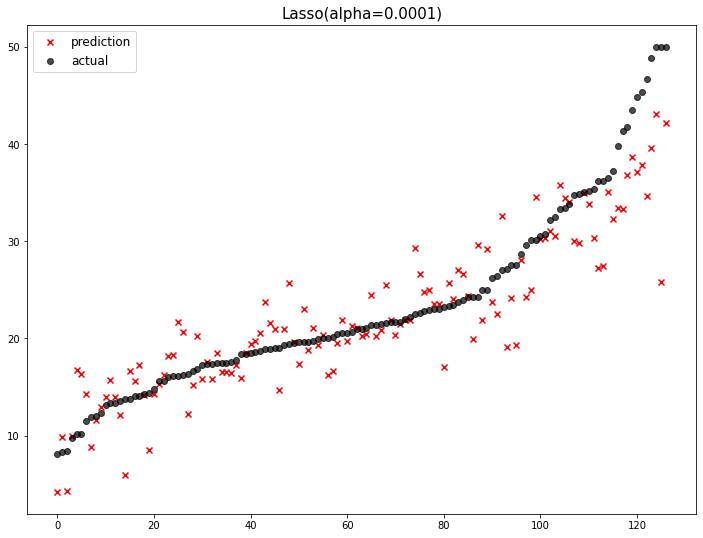

                  model        mse
0      Lasso(alpha=100)  72.630059
1       Lasso(alpha=10)  46.797567
2        Lasso(alpha=1)  29.880988
3      Ridge(alpha=100)  23.948544
4      Lasso(alpha=0.1)  21.642204
5       Ridge(alpha=10)  20.904899
6        Ridge(alpha=1)  19.785997
7     Lasso(alpha=0.01)  19.656366
8    Lasso(alpha=0.001)  19.585064
9   Lasso(alpha=0.0001)  19.582561
10  Ridge(alpha=0.0001)  19.582312
11   Ridge(alpha=0.001)  19.582108
12    Ridge(alpha=0.01)  19.580180
13     Ridge(alpha=0.1)  19.571019


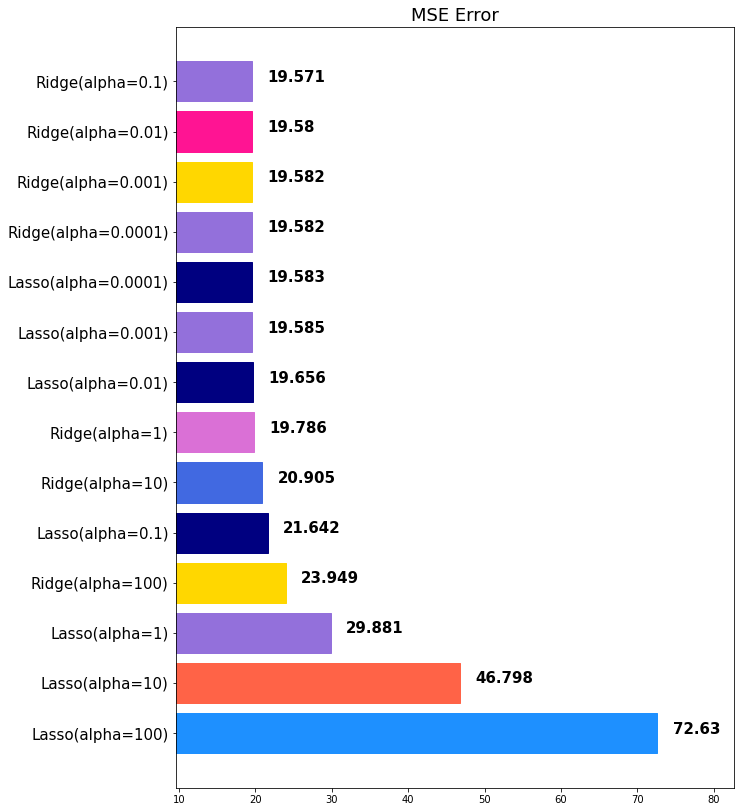

In [ ]:
alphas = [100, 10, 1, 0.1, 0.01, 0.001, 0.0001]

for alpha in alphas:
    lasso = Lasso(alpha = alpha)
    lasso.fit(X_train, y_train)
    pred = lasso.predict(X_valid)
    mse_eval(f"Lasso(alpha={alpha})", pred, y_valid) 

    train_score = lasso.score(X_valid, y_valid)
    valid_score = Lasso 



In [ ]:
#lasso 선형모델 -단순해서 빠르지만 복잡하지 않아서 어떤 한계가 있다?

AttributeError: ignored

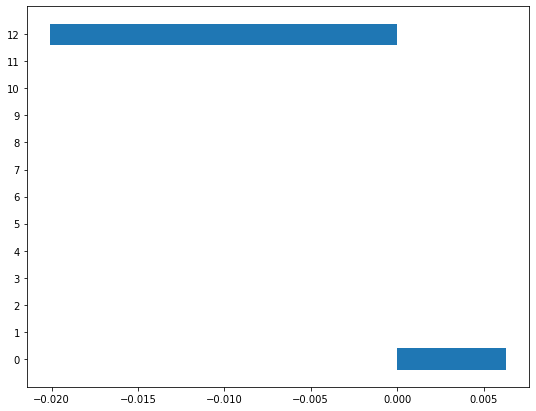

In [ ]:
lasso100 = Lasso(alpha=100)
lasso100.fit(X_train, y_train)
lasso100_pred = lasso100.predict(X_valid)

lasso001 = Lasso(alpha=0.001)
lasso001.fit(X_train, y_train)
lasso001.pred = lasso001.predict(X_valid)

plot_coef(X_train.columns, lasso100.coef_)

AttributeError: ignored

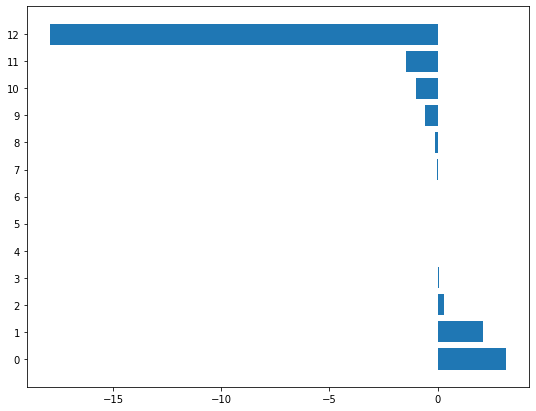

In [ ]:
plot_coef(X_train.columns, lasso001.coef_)

# ElasticNet
* Ridge와 Lasso의 규제 방식을 같이 사용
* l1_ratio 반 l2 반반씩 
 * ㅣ1_ratio = 0(L2만 사용)
* ㅣ1_ratio =1(L1만 사용)
* 0 < l1_ratio < 1( L1과 L2의 혼합사용)

In [ ]:
from sklearn.linear_model import ElasticNet

In [ ]:
ratios = [0.2, 0.5, 0.8]

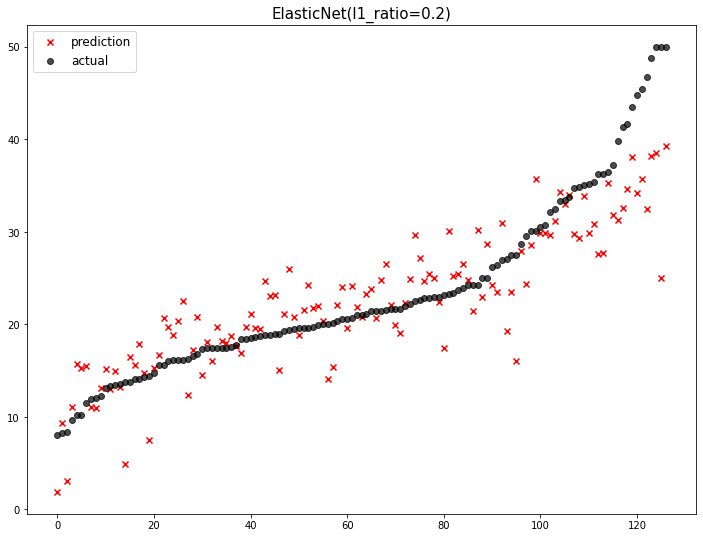

                       model        mse
0           Lasso(alpha=100)  72.630059
1            Lasso(alpha=10)  46.797567
2             Lasso(alpha=1)  29.880988
3   ElasticNet(l1_ratio=0.2)  25.477990
4           Ridge(alpha=100)  23.948544
5           Lasso(alpha=0.1)  21.642204
6            Ridge(alpha=10)  20.904899
7             Ridge(alpha=1)  19.785997
8          Lasso(alpha=0.01)  19.656366
9         Lasso(alpha=0.001)  19.585064
10       Lasso(alpha=0.0001)  19.582561
11       Ridge(alpha=0.0001)  19.582312
12        Ridge(alpha=0.001)  19.582108
13         Ridge(alpha=0.01)  19.580180
14          Ridge(alpha=0.1)  19.571019


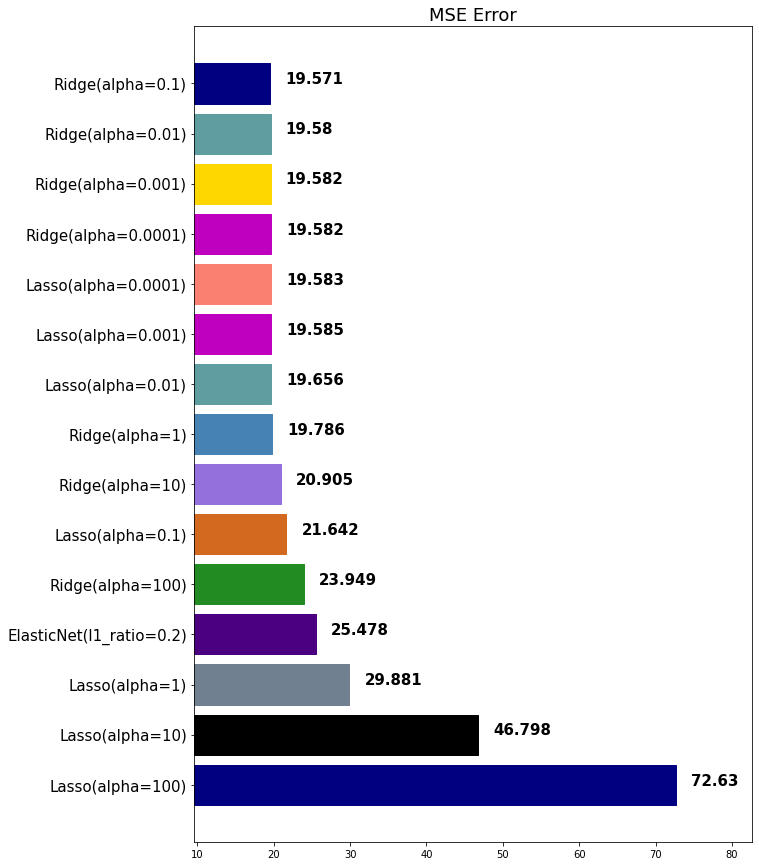

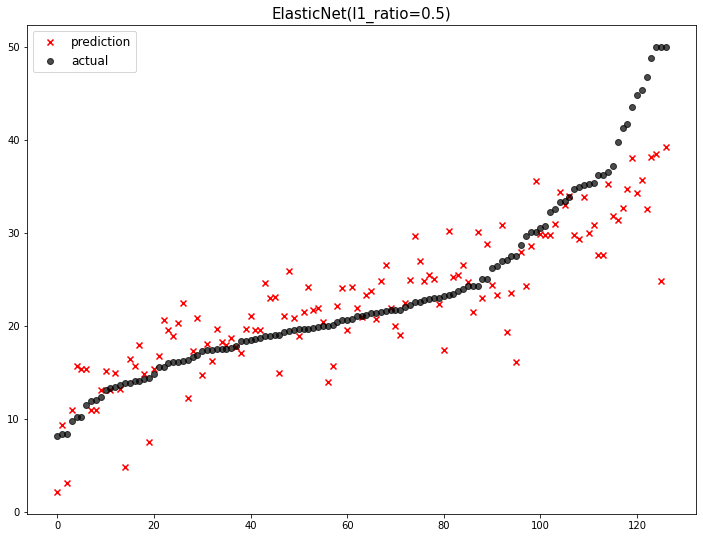

                       model        mse
0           Lasso(alpha=100)  72.630059
1            Lasso(alpha=10)  46.797567
2             Lasso(alpha=1)  29.880988
3   ElasticNet(l1_ratio=0.2)  25.477990
4   ElasticNet(l1_ratio=0.5)  25.388646
5           Ridge(alpha=100)  23.948544
6           Lasso(alpha=0.1)  21.642204
7            Ridge(alpha=10)  20.904899
8             Ridge(alpha=1)  19.785997
9          Lasso(alpha=0.01)  19.656366
10        Lasso(alpha=0.001)  19.585064
11       Lasso(alpha=0.0001)  19.582561
12       Ridge(alpha=0.0001)  19.582312
13        Ridge(alpha=0.001)  19.582108
14         Ridge(alpha=0.01)  19.580180
15          Ridge(alpha=0.1)  19.571019


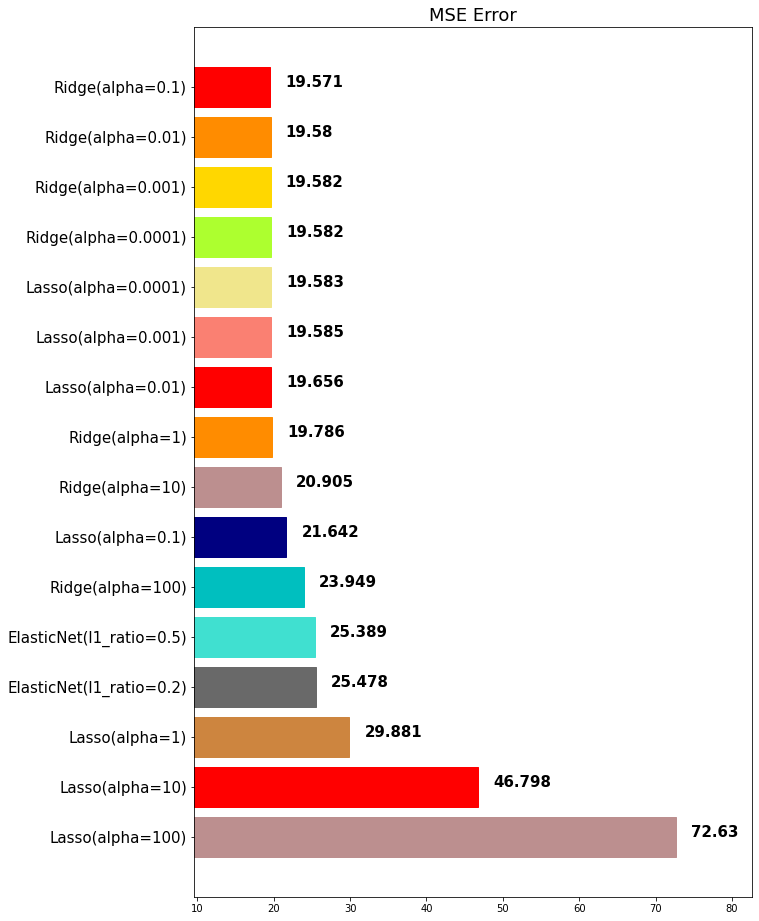

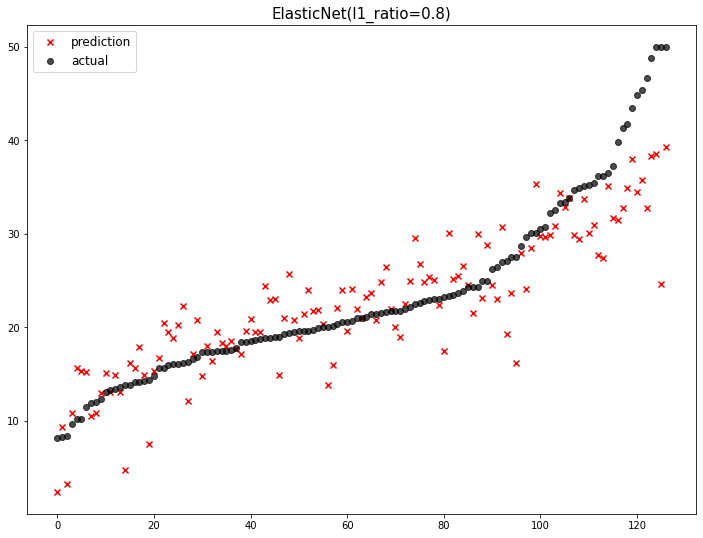

                       model        mse
0           Lasso(alpha=100)  72.630059
1            Lasso(alpha=10)  46.797567
2             Lasso(alpha=1)  29.880988
3   ElasticNet(l1_ratio=0.2)  25.477990
4   ElasticNet(l1_ratio=0.5)  25.388646
5   ElasticNet(l1_ratio=0.8)  25.068148
6           Ridge(alpha=100)  23.948544
7           Lasso(alpha=0.1)  21.642204
8            Ridge(alpha=10)  20.904899
9             Ridge(alpha=1)  19.785997
10         Lasso(alpha=0.01)  19.656366
11        Lasso(alpha=0.001)  19.585064
12       Lasso(alpha=0.0001)  19.582561
13       Ridge(alpha=0.0001)  19.582312
14        Ridge(alpha=0.001)  19.582108
15         Ridge(alpha=0.01)  19.580180
16          Ridge(alpha=0.1)  19.571019


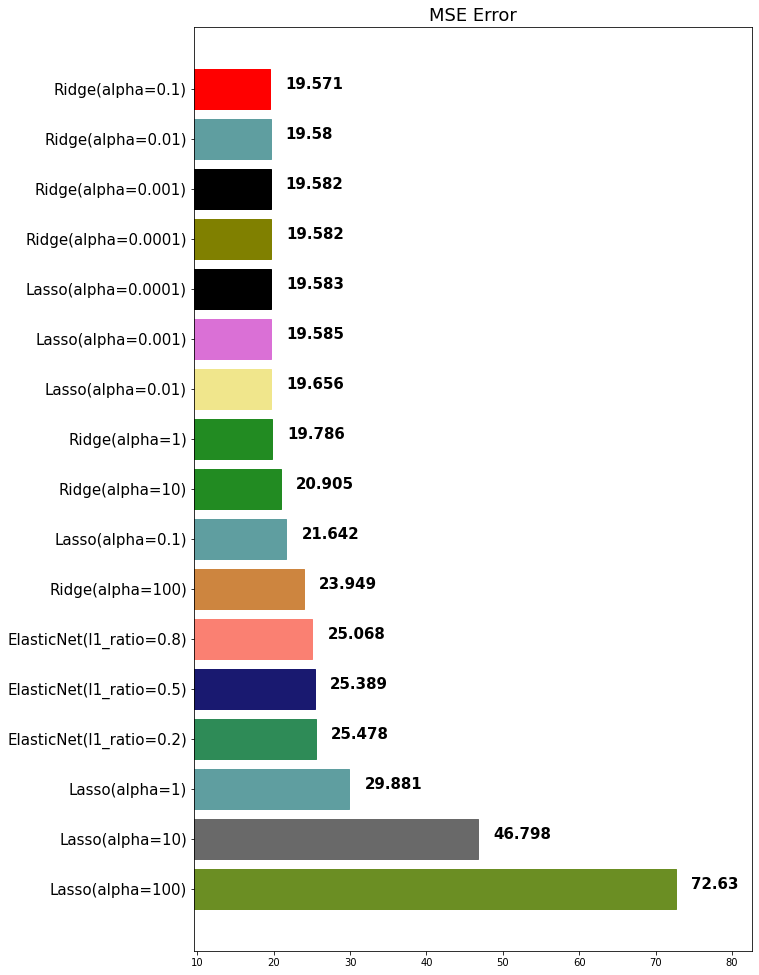

In [ ]:
for ratio in ratios:
    elastic_net = ElasticNet(alpha=0.5, l1_ratio=ratio)
    elastic_net.fit(X_train, y_train)

    pred = elastic_net.predict(X_valid)
    mse_eval("ElasticNet(l1_ratio={})".format(ratio), pred, y_valid)

오후 진도 스케일링- transformer 

StandardScaler

In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

In [ ]:
std_scaler = StandardScaler()
X_train_std_scaled = std_scaler.fit_transform(X_train) 

round(pd.DataFrame(X_train_std_scaled).describe(), 2) #소수점 둘째자리 올림
mean =0 std = 1이 #데이터 표준화 가지고 있던 실제 값은 중요하지 않음 /스케일이작아질수록 머신러닝에서 해결하기 좋음 

,0,1,2,3,4,5,6,7,8,9,10,11,12
count,379.00,379.00,379.00,379.00,379.00,379.00,379.00,379.00,379.00,379.00,379.00,379.00,379.00
mean,0.00,0.00,-0.00,0.00,-0.00,-0.00,-0.00,0.00,-0.00,0.00,0.00,-0.00,-0.00
std,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
min,-0.42,-0.50,-1.59,-0.28,-1.44,-3.93,-2.25,-1.25,-0.99,-1.36,-2.80,-3.79,-1.51
25%,-0.41,-0.50,-0.90,-0.28,-0.91,-0.58,-0.88,-0.81,-0.65,-0.78,-0.54,0.21,-0.79
50%,-0.39,-0.50,-0.21,-0.28,-0.14,-0.07,0.32,-0.29,-0.54,-0.42,0.25,0.39,-0.21
75%,-0.00,0.03,1.00,-0.28,0.65,0.47,0.92,0.67,1.61,1.50,0.82,0.44,0.61
max,8.94,3.78,2.42,3.61,2.69,3.58,1.13,3.26,1.61,1.77,1.68,0.45,3.50


#MinMaxScaler(정규화)
최소값을 0, 최대값을 1정규화
(값의 "분포"를 스케일링)

최소 최대값이 존재할 경우, min max scaler 가 쓰는게 나을것임

#StadnardScaler(표준화)
평균이 0, 표준편차가 1 되도록

(값의 "크기"를 스케일링)
값의 min max 없을때 





# MinMaxScaler

In [ ]:
minmax_scaler = MinMaxScaler()
X_train_minmax_scaled = minmax_scaler.fit_transform(X_train)

In [ ]:
round(pd.DataFrame(X_train_minmax_scaled).describe(),2)

,0,1,2,3,4,5,6,7,8,9,10,11,12
count,379.00,379.00,379.00,379.00,379.00,379.00,379.00,379.00,379.00,379.00,379.00,379.00,379.00
mean,0.04,0.12,0.40,0.07,0.35,0.52,0.67,0.28,0.38,0.43,0.63,0.89,0.30
std,0.11,0.23,0.25,0.26,0.24,0.13,0.30,0.22,0.38,0.32,0.22,0.24,0.20
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,0.00,0.00,0.17,0.00,0.13,0.45,0.41,0.10,0.13,0.18,0.51,0.94,0.14
50%,0.00,0.00,0.35,0.00,0.31,0.51,0.76,0.21,0.17,0.30,0.68,0.99,0.26
75%,0.04,0.12,0.65,0.00,0.51,0.59,0.94,0.43,1.00,0.91,0.81,1.00,0.42
max,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00


# RobustScaler
* 중앙값을 0으로 만듬
* IQR(Inter Quantile Range)을 1로 변환 
중간값을 기준으로 outlier 판별 

아웃라이어 처리에 좋음

standard scaler

In [ ]:
robust_scaler = RobustScaler()
X_train_robust_scaled = robust_scaler.fit_transform(X_train)

round(pd.DataFrame(X_train_robust_scaled).describe(),2)

,0,1,2,3,4,5,6,7,8,9,10,11,12
count,379.00,379.00,379.00,379.00,379.00,379.00,379.00,379.00,379.00,379.00,379.00,379.00,379.00
mean,0.97,0.94,0.11,0.07,0.09,0.07,-0.18,0.19,0.24,0.18,-0.18,-1.73,0.15
std,2.45,1.87,0.53,0.26,0.64,0.95,0.56,0.67,0.44,0.44,0.74,4.42,0.72
min,-0.06,0.00,-0.73,0.00,-0.84,-3.68,-1.43,-0.65,-0.20,-0.41,-2.25,-18.47,-0.93
25%,-0.04,0.00,-0.36,0.00,-0.49,-0.48,-0.67,-0.35,-0.05,-0.16,-0.58,-0.79,-0.42
50%,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
75%,0.96,1.00,0.64,0.00,0.51,0.52,0.33,0.65,0.95,0.84,0.42,0.21,0.58
max,22.84,8.00,1.38,1.00,1.82,3.49,0.45,2.39,0.95,0.96,1.05,0.26,2.66
